### **Califronia Housing Price**

[Sumber Data California Housing Price]()
### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****


### **1. Business Problem Understanding**

**Context**

California memiliki harga rumah yang sangat bervariasi. Ada beberapa wilayah yang memiliki harga yang cukup tinggi dibandingkan wilayah lainnya. Berdasarkan data yang diperoleh pada tahun 1990, bisa dilihat bahwa variasi harga rumah di Calfornia ini dipengaruhi beberapa faktor, seperti pendapatan penghuni, populasi penduduk, lokasi rumah, umur bangunan serta jarak dari rumah tersebut ke pantai.

Variasi harga rumah ini cukup menyulitkan para calon pembeli maupun investor untuk mengambil keputusan dalam memperkirakan berapa harga wajar dari rumah-rumah yang tersedia. Selain itu, para developer properti juga memiliki kesulitan untuk menentukan faktor-faktor yang mempengaruhi tinggi-rendah nya harga rumah.

Di sisi lain, dalam dunia properti memiliki asumsi bahwa semakin dekat jarak rumah ke laut, maka semakin tinggi pula harga rumah tersebut. Hal ini didukung dengan salah satu jurnal yang dibuat oleh Chen et al., 2023 [Analysis and Forecasting of California Housing](https://www.researchgate.net/publication/367534478_Analysis_and_Forecasting_of_California_Housing) yang menyatakan bahwa harga rumah menurun secara signifikan seiring jarak dari pantai meningkat.

**Business Problem**

Berdasarkan latar belakang tersebut, dapat disimpulkan bahwa para stakeholder seperti calon pembeli rumah, investor properti, dan developer perumahan hanya dapat meperkirakan harga rumah secara subjektif, tanpa adanya analisis mendalam berbasis data. Hal ini akan menyebabkan para stakeholder tidak dapat mengevaluasi harga rumah yang masuk akal, lokasi rumah yang layak untuk diinvestasi, serta estimasi harga rumah.

Selain itu, salah satu faktor yang diyakini dapat mempengaruhi harga rumah adalah ocean proximity atau kedekatan terhadap laut, dimana semakin dekat suatu rumah dengan laut atau daerah pesisir, maka semakin tinggi pula harga rumah tersebut. Namun, tidak terdapat bukti secara kuantitatif yang mendukung pernyataan tersebut.



**Business Goals**

Berdasarkan permasalahan tersebut, dibutuhkan sebuah prediction tool yang dapat memprediksi harga rumah dan menganalisis secara kuantitatif pengaruh kedekatan laut terhadap harga rumah, serta mengidentifikasi faktor-faktor paling signifikan yang memengaruhi nilai properti. Dengan adanya prediction tool ini, diharapkan dapat memenuhi kebutuhan para stakeholder dalam membuat keputusan dalam membeli ataupun berinvestasi pada suatu properti.

**Analytic Approach**

Untuk mencapai business goal tersebut, langkah peratama yang akan dilakukan adalah menganalisa data secara menyeluruh untuk memahami pola-pola yang membuat harga rumah berbeda di tiap wilayah. Selain itu analisa juga akan dilakukan untuk mengetahui apakah rumah yang berlokasi lebih dekat ke laut benar-benar memiliki nilai yang lebih tinggi dibandingkan wilayah lainnya.

Setelah itu, kami akan membangun sebuah model prediksi harga rumah berbasis regresi, yang dapat digunakan sebagai alat bantu bagi stakeholder untuk memperkirakan harga properti baru.

**Metric Evaluation**

Untuk mengevaluasi performa model, kita menggunakan dua metrik utama: Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE). MAE menunjukkan seberapa besar rata-rata selisih antara hasil prediksi dan nilai sebenarnya, dalam satuan dolar, jadi cukup mudah dipahami dari sisi bisnis. RMSE digunakan karena lebih sensitif terhadap kesalahan besar, sehingga bisa membantu mengidentifikasi prediksi yang meleset jauh. Dengan kombinasi kedua metrik ini, kita bisa menilai apakah model cukup akurat dan stabil untuk digunakan dalam konteks prediksi harga rumah.


### **2. Data Understanding**

Note :
- Data yang digunakan dalam proyek ini berasal dari sensus California tahun 1990. 
- Setiap baris mewakili satu distrik atau area geografis di California, bukan properti individu. 
- Data ini berisi informasi demografi dan perumahan seperti jumlah kamar, jumlah rumah tangga, pendapatan median, serta lokasi geografis berupa koordinat.

**Attribute Information**
| Attribute            | Data Type, Length  | Description                                                           |
| -------------------- | ------------------ | --------------------------------------------------------------------- |
| `longitude`          | Float              | Koordinat geografis arah barat, lokasi wilayah di peta                |
| `latitude`           | Float              | Koordinat geografis arah utara, lokasi wilayah di peta                |
| `housing_median_age` | Float              | Umur median bangunan per wilayah                                      |
| `total_rooms`        | Float              | Jumlah total kamar dari semua properti di wilayah tersebut            |
| `total_bedrooms`     | Float              | Jumlah total kamar tidur dari semua properti di wilayah tersebut      |
| `population`         | Float              | Jumlah penduduk di wilayah                                            |
| `households`         | Float              | Jumlah rumah tangga di wilayah                                        |
| `median_income`      | Float              | Pendapatan median per rumah tangga dalam satuan puluhan ribu USD      |
| `median_house_value` | Float              | Harga median rumah di wilayah (target variabel) dalam satuan USD      |
| `ocean_proximity`    | Categorical (Text) | Kategori kedekatan wilayah terhadap laut (`<1H OCEAN`, `INLAND`, dll) |


**Libraries**

Berikur adalah Library yang saya gunakan, saya pindahkan semua keatas agar lebih rapi dan tidak membingungkan

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Statistical Tools
import scipy.stats as stats
from scipy.stats import kruskal

# Preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Target Transformation 
from sklearn.compose import TransformedTargetRegressor


In [2]:
#Load Dataset
df = pd.read_csv("/Users/jhonsonjustin/Desktop/Pruwadhika/Capstone 3/California House/data_california_house.csv")

In [3]:
# Pengecekan data

print("Preview Data:")
display(df.head())

print("\nInfo Data:")
df.info()

print("\nMissing Values per Column:")
print(df.isnull().sum())

Preview Data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0



Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB

Missing Values per Column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
oce

#### **Data Cleaning Dasar**

**Cek Missing Value**

In [4]:
print("Missing values sebelum cleaning:")
print(df.isnull().sum())

Missing values sebelum cleaning:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


**Mengisi Missing Values**

Nilai kosong pada kolom total_bedrooms diisi menggunakan nilai median dari kolom dengan pertimbangan nilai median lebih stabil terhadap outlier

In [5]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)

**Cek Data Duplikat**

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


#### **Exploratory Data Analysis (EDA)**

**Distribusi Harga Rumah (Median House Value)**

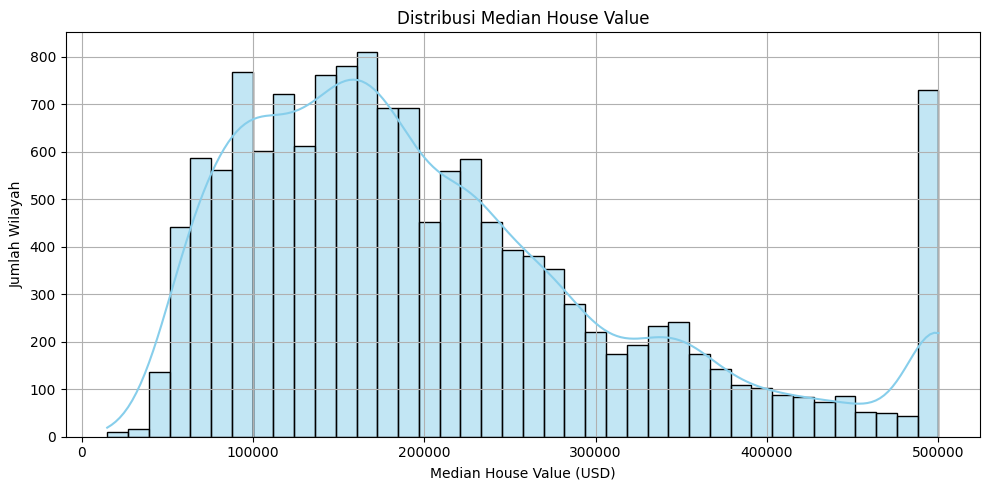

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['median_house_value'], kde=True, bins=40, color='skyblue')
plt.title('Distribusi Median House Value')
plt.xlabel('Median House Value (USD)')
plt.ylabel('Jumlah Wilayah')
plt.grid(True)
plt.tight_layout()
plt.show()

Notes :
- Distribusi harga rumah skewed ke kanan.
- Mayoritas rumah memiliki harga di bawah 250.000 USD.
- Ada batas atas di 500.000 USD, kemungkinan hasil data clipping dari sensus (sistem pencatatan hanya mencatat harga rumah sampai maksimum 500.000 USD).

**Distribusi Total Bedrooms**

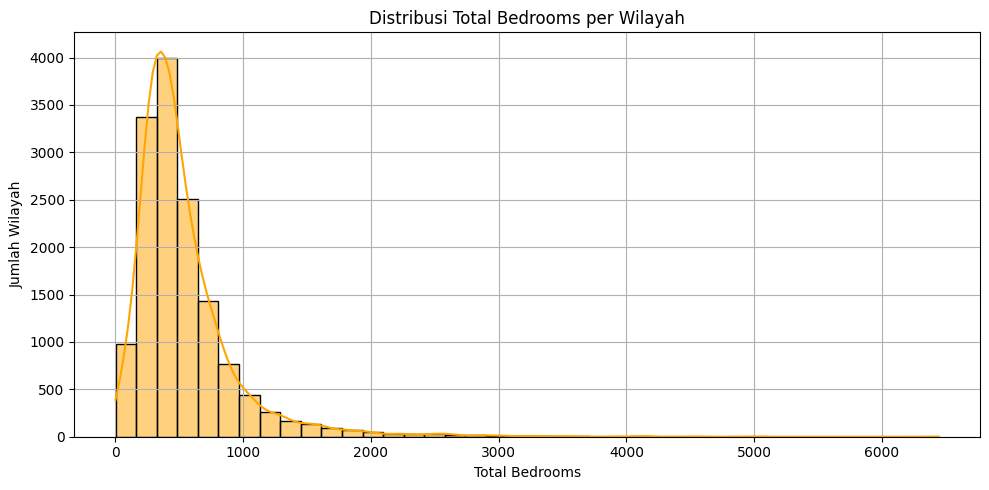

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_bedrooms'], kde=True, bins=40, color='orange')
plt.title('Distribusi Total Bedrooms per Wilayah')
plt.xlabel('Total Bedrooms')
plt.ylabel('Jumlah Wilayah')
plt.grid(True)
plt.tight_layout()
plt.show()

Notes :
- Distribusi data skewed ke kanan
- Sebagian kecil wilayah memiliki jumlah kamar tidur yang sangat tinggi.

**Distribusi Median Income**

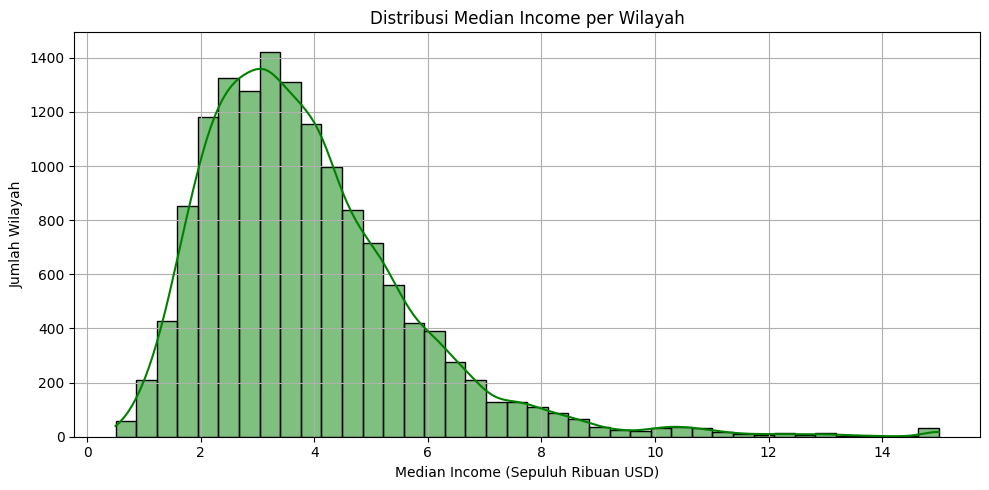

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['median_income'], kde=True, bins=40, color='green')
plt.title('Distribusi Median Income per Wilayah')
plt.xlabel('Median Income (Sepuluh Ribuan USD)')
plt.ylabel('Jumlah Wilayah')
plt.grid(True)
plt.tight_layout()
plt.show()

Notes :
- Sebagian besar distrik memiliki pendapatan median antara 2–6 (artinya $20.000–$60.000).
- Distribusi terlihat cukup normal dengan sedikit skewed ke kanan.

**Boxplot Ocean Proximity vs Harga Rumah**

/var/folders/w7/bg5wr_cx3ss25nwxdx_b_qbh0000gn/T/ipykernel_4939/630053895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', palette='Set2')


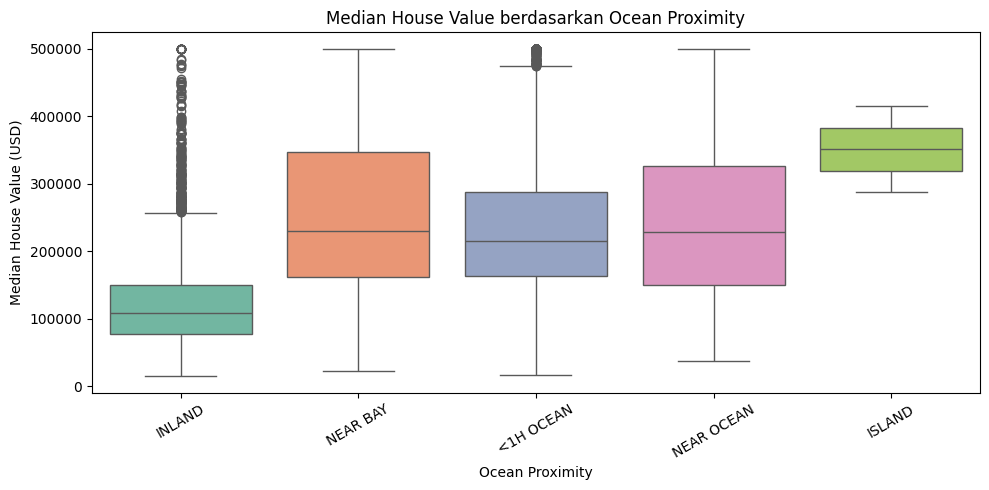

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', palette='Set2')
plt.title('Median House Value berdasarkan Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value (USD)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Notes : 
- Harga rumah di kategori <1H OCEAN, NEAR BAY, dan ISLAND cenderung lebih tinggi.
- Kategori INLAND memiliki harga paling rendah secara konsisten.
- Variasi harga lebih lebar di area dekat laut.
- Indikasi awal bahwa kedekatan ke laut berpengaruh terhadap harga rumah

**Peta Lokasi berdasarkan Harga Rumah**

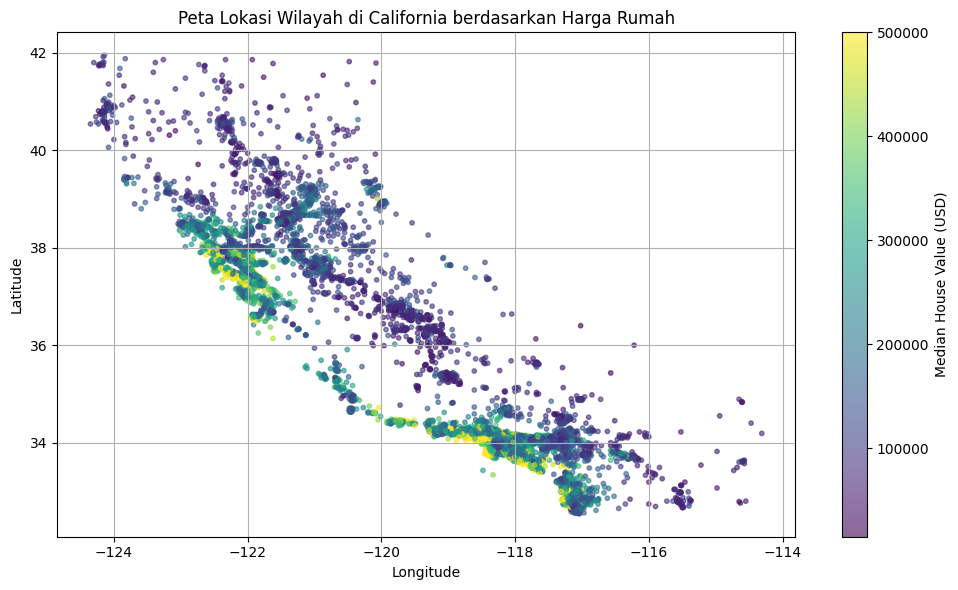

In [12]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['median_house_value'],
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(sc, label='Median House Value (USD)')
plt.title('Peta Lokasi Wilayah di California berdasarkan Harga Rumah')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Note :
- Warna semakin terang, harga semakin tinggi
- Berdasarkan Peta ini, bisa dilihat memang harga rumah yang semaking dekat kelaut memiliki harga yang realtif tinggi, ditandai dengan warna kekuningan.

**Korelasi antar Fitur**

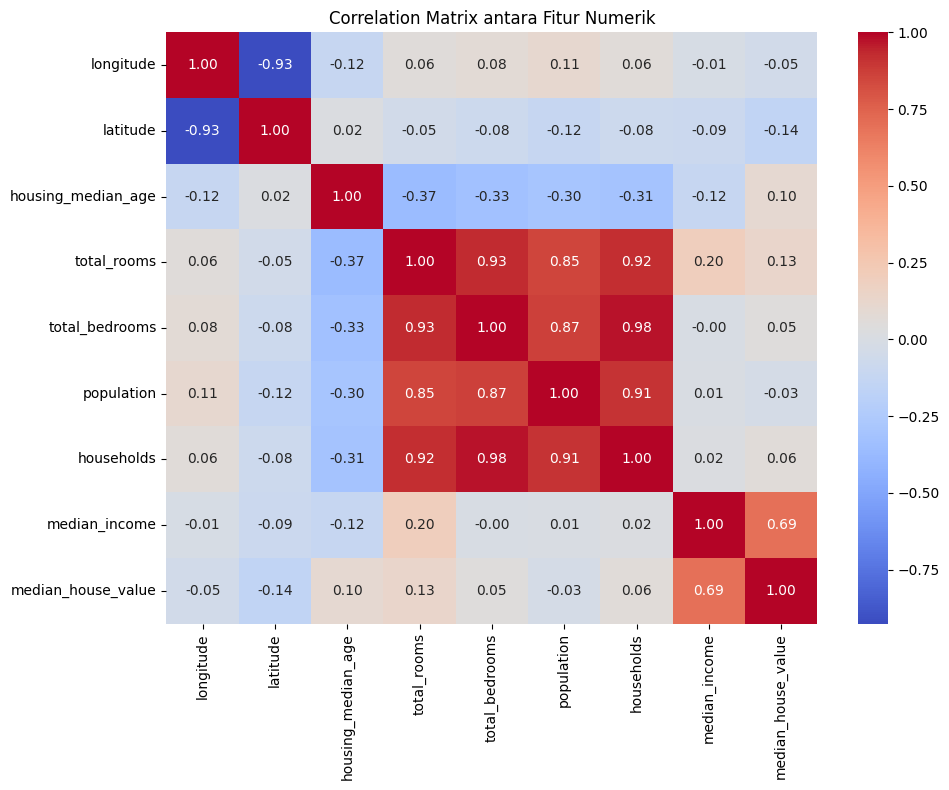

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix antara Fitur Numerik")
plt.tight_layout()
plt.show()

Notes :
- median_income memiliki korelasi paling kuat terhadap median_house_value.
- Fitur total_rooms, total_bedrooms, population, dan households saling berkorelasi sangat tinggi (>0.9) sehingga perlu untuk dipertibangkan



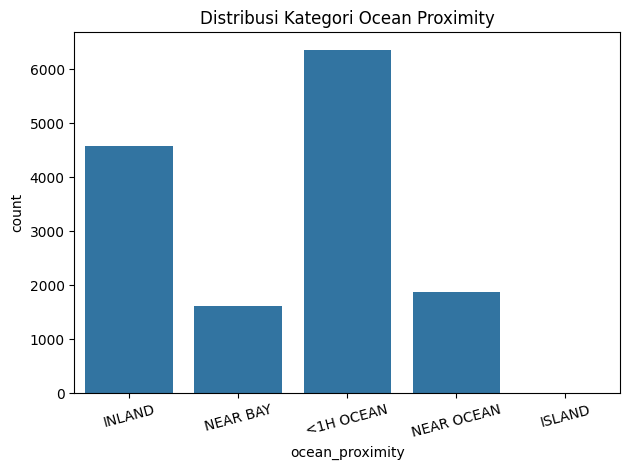

In [14]:
sns.countplot(data=df, x='ocean_proximity')
plt.title('Distribusi Kategori Ocean Proximity')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Notes:
- Kategori <1H OCEAN adalah yang paling tinggi dalam dataset.
- ISLAND tidak muncul, bisa dikatakan sangat jarang (data sangat sedikit) dan dijadikan outlier.

### **Uji Statistik untuk Ocean Proximity**

**Distribusi Harga per Kategori**

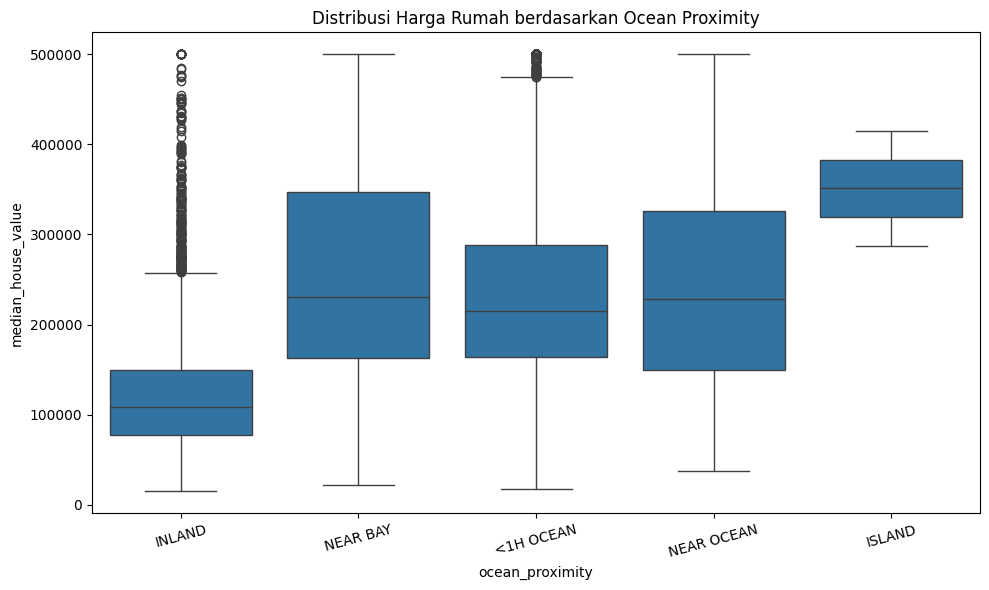

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Distribusi Harga Rumah berdasarkan Ocean Proximity')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Notes:
- ISLAND punya harga rumah tertinggi secara median dan cenderung sempit distribusinya namun jumlah datanya sangat sedikit.
- NEAR BAY & NEAR OCEAN punya median harga rumah lebih tinggi dibandingkan kategori lain.
- <1H OCEAN cukup tersebar median-nya di atas INLAND tapi di bawah NEAR BAY/OCEAN.
- INLAND punya median harga rumah paling rendah, dengan sebaran lebih kecil dan banyak outlier bawah.



**Cek Normalitas**

**Uji Shapiro-Wilk**

In [16]:
categories = df['ocean_proximity'].unique()

# Cek normalitas dengan Shapiro-Wilk untuk masing-masing kategori
for cat in categories:
    data = df[df['ocean_proximity'] == cat]['median_house_value']
    sample_size = min(500, len(data))
    stat, p = stats.shapiro(data.sample(sample_size, random_state=42))
    print(f'{cat}: p-value = {p}')

INLAND: p-value = 1.0270655558259904e-22
NEAR BAY: p-value = 1.297547546417607e-13
<1H OCEAN: p-value = 4.843804488493049e-17
NEAR OCEAN: p-value = 8.790038547582779e-13
ISLAND: p-value = nan


/var/folders/w7/bg5wr_cx3ss25nwxdx_b_qbh0000gn/T/ipykernel_4939/2614343681.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = stats.shapiro(data.sample(sample_size, random_state=42))


Notes:
- Semua kategori tidak berdistribusi normal (p<0.05)), maka harus menggunakan Kruskal-Walis

**Uji Kruskal-Walis**


In [17]:
# Kelompokkan data per kategori (kecuali ISLAND)
grouped = [
    df[df['ocean_proximity'] == 'INLAND']['median_house_value'],
    df[df['ocean_proximity'] == 'NEAR BAY']['median_house_value'],
    df[df['ocean_proximity'] == '<1H OCEAN']['median_house_value'],
    df[df['ocean_proximity'] == 'NEAR OCEAN']['median_house_value'],
]

stat, p = kruskal(*grouped)
print("=== Hasil Uji Kruskal-Wallis ===")
print(f"p-value       : {p:.6f}")

if p < 0.05:
    print("Terdapat perbedaan signifikan antara kategori ocean_proximity terhadap harga rumah.")
else:
    print("Tidak terdapat perbedaan signifikan antara kategori ocean_proximity terhadap harga rumah.")


=== Hasil Uji Kruskal-Wallis ===
p-value       : 0.000000
Terdapat perbedaan signifikan antara kategori ocean_proximity terhadap harga rumah.


Notes :
- Menolak H0 karena p<0.05. Maka dapat disimpulkan bahwa kedekatan terhadap laut (ocean proximity) secara signifikan memengaruhi harga rumah di California.
- Ocean Proximity layak dijadikan fitur penting dalam model prediksi harga rumah

### **3. Data Pre Processing**

Data Pre Processing ini dilakukan untuk mempersiapkan data sebelum masuk ke tahap modelling. Berikut adalah beberapa tahapan yang akan dilakukan :

1. Menangani missing values --> kolom total_bedrooms memiliki missing value dan akan diisi dengan nilai median --> sudah dilakukan pada data cleaning
2. Fitur Encoding --> konversi fitur ocean_proximity menggunakan One Hot Encoding
3. Fitur Engineering --> membuat beberapa fitur-fitur baru
4. Fitur Scalling --> melakukan standarisasi agar skala yang dimiliki seimbang

#### **Tandai Rumah (Harga>=500001)**

Menandai rumah dengan median_house_value = 500001 sebagai is_capped = 1.

Menurut saya perlu dilakukan karna harga rumah di data ini dibatasi sistem, jadi bisa mempengaruhi akurasi model.

In [18]:
# Tambahkan kolom apakah harga rumah mentok di 500001
df['is_capped'] = (df['median_house_value'] >= 500001).astype(int)

#### **Feature Encoding (One-Hot Encoding)**

Mengubah kolom kategorikal ocean_proximity menjadi kolom numerik biner.

Hal ini dilakukan karena Model ML tidak bisa membaca teks, jadi kategori diubah jadi angka (dummy variables).

In [19]:
pd.get_dummies(df['ocean_proximity'])



,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,True,False,False,False
1,False,False,False,True,False
2,True,False,False,False,False
3,True,False,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
14443,False,True,False,False,False
14444,False,True,False,False,False
14445,False,False,False,False,True
14446,True,False,False,False,False


In [20]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

#### **Feature Engineering**

Membuat fitur baru dari fitur yang sudah ada, seperti rooms_per_household, bedrooms_per_room, population_per_household

Fitur ini membantu model mengenali hubungan antar variabel.

In [21]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

#### **Handling Outlier**

Menghapus data yang nilainya terlalu ekstrem di fitur karna bisa mengganggu model dan menurunkan akurasi model, terutama model yang berbasis jarak atau asumsi normal.

In [22]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,is_capped,rooms_per_household,bedrooms_per_room,population_per_household
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516,0.046927,5.423404,0.213237,3.040518
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182,0.211490,2.287619,0.060405,6.868167
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.846154,0.054994,0.750000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000,0.000000,4.452249,0.175358,2.427269
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000,0.000000,5.229318,0.202855,2.816355
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000,0.000000,6.047619,0.239421,3.280445
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,132.533333,1.000000,599.714286


Notes :
- total_rooms: nilai maksimum sangat jauh dari median -> indikasi outlier.
- total_bedrooms: outlier juga terlihat jelas.
- population: max = 35,682 vs median = 1,165 -> distribusi sangat tidak normal.
- rooms_per_household: max = 132.5 sangat jauh dari Q3 = 6.0 -> perlu penanganan.
- median_house_value: capped di 500,001 → bisa merusak prediksi harga tinggi.

Akan saya visualisasikan dalam boxplot untuk memperjelas

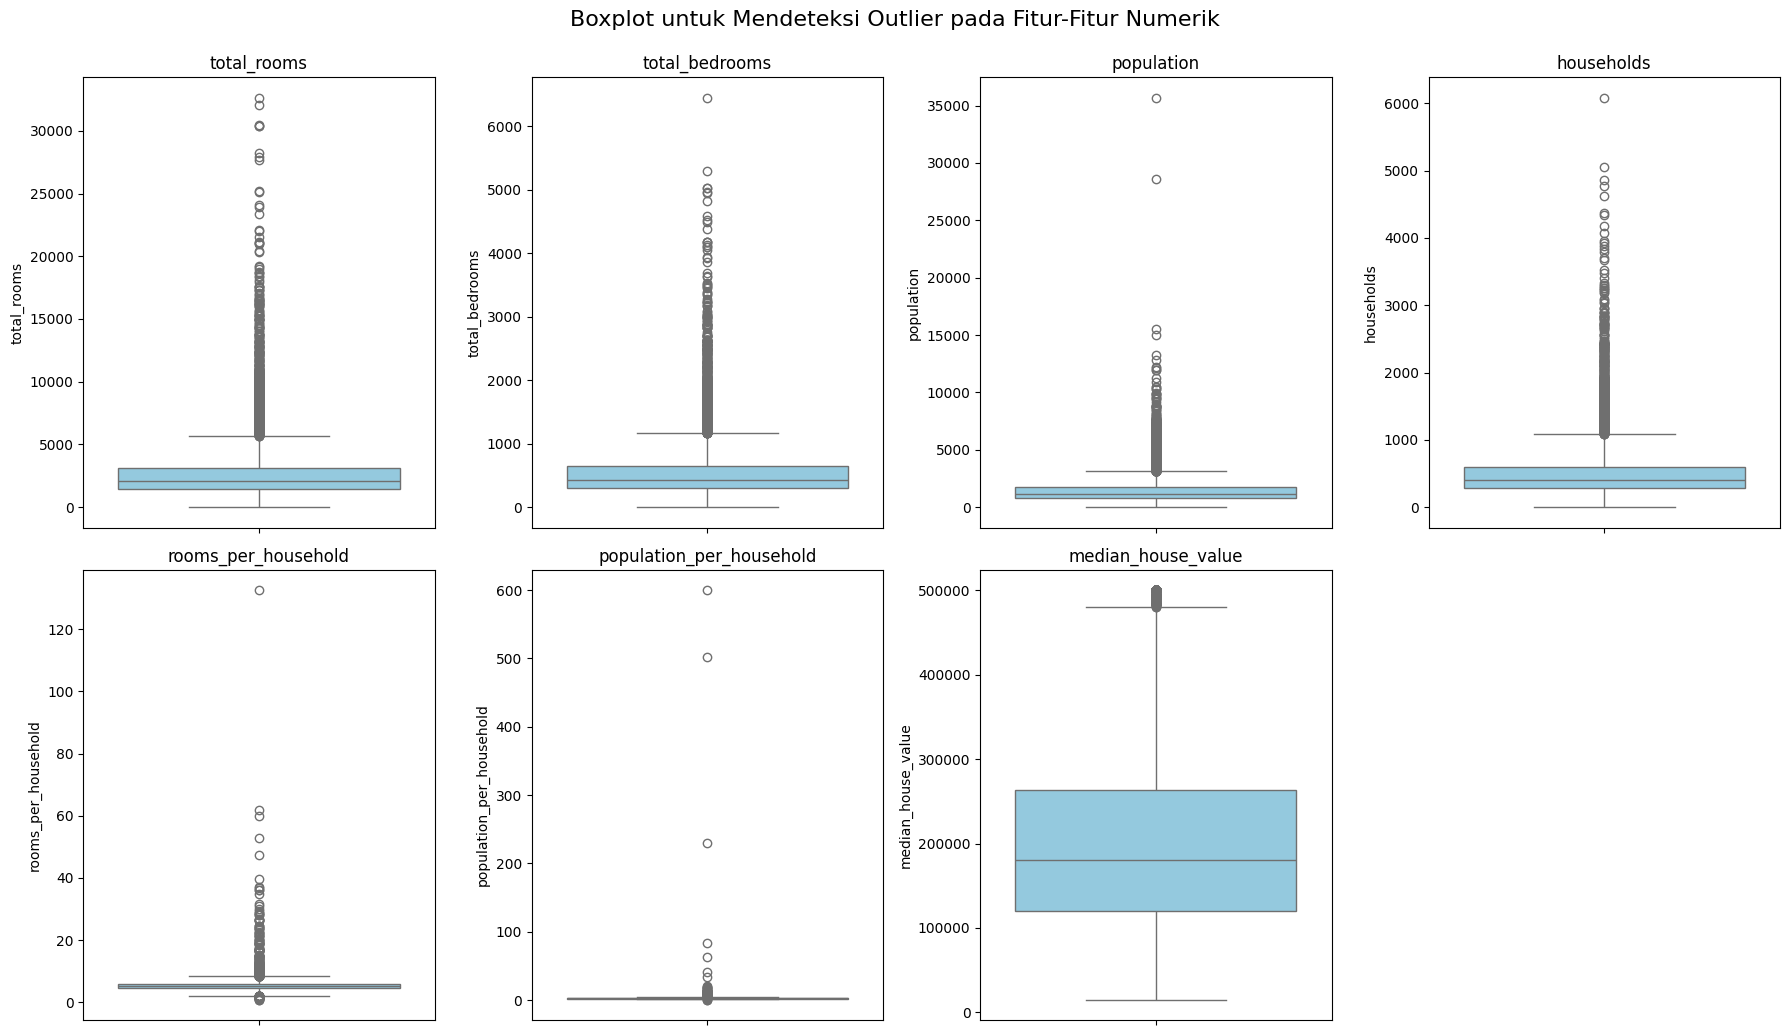

In [23]:
# Fitur yang ingin divisualisasikan
features = [
    'total_rooms', 'total_bedrooms', 'population', 'households',
    'rooms_per_household', 'population_per_household', 'median_house_value'
]

# Buat subplot
plt.figure(figsize=(18, 10))
for i, col in enumerate(features):
    plt.subplot(2, 4, i+1)  # 2 baris, 4 kolom
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Boxplot untuk Mendeteksi Outlier pada Fitur-Fitur Numerik', fontsize=16, y=1.03)
plt.show()

Notes :

Visualisasi menunjukkan bahwa sebagian besar fitur memiliki outlier, terutama:
- total_rooms, population, households -> outlier ekstrem
- rooms_per_household -> memiliki outlier yang sangat tinggi (hingga >100)
- median_house_value -> terlihat ada batas maksimum sistem sebesar 500,001

Maka kita akan membersihkan feature :
- total_rooms
- total_bedrooms
- poplation
- households
- rooms_per_household
- population_per_household

In [24]:
# Daftar fitur numerik yang akan dicek outliernya
fitur_outlier = ['total_rooms', 'total_bedrooms', 'population','households', 'rooms_per_household', 'population_per_household']

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = df.copy()

for col in fitur_outlier:
    df_clean = remove_outliers_iqr(df_clean, col)

print(f"Jumlah data sebelum cleaning: {df.shape[0]}")
print(f"Jumlah data setelah cleaning: {df_clean.shape[0]}")


Jumlah data sebelum cleaning: 14448
Jumlah data setelah cleaning: 11986


Notes :

median_house_value tidak dibersihkan karena nilai maksimum 500001 adalah batas sistem bawaan bukan berupa outlier

#### **Feature Scalling**

Berhubung sudah dilakukan outlier handling, data sebagian besar tidak terlalu skewed ekstrem, maka akan digunakan standardscaler

In [25]:
# 1. Tentukan fitur numerik dan target
fitur_numerik = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]

# 2. Pisahkan fitur dan target
X = df_clean.drop(columns='median_house_value')
y = df_clean['median_house_value']

# 3. Split dulu sebelum scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=10
)

# Pipeline untuk kolom numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Definisikan preprocessor (transformer)
transformer = ColumnTransformer([
    ('num', num_pipeline, fitur_numerik)
])

Membuat grafik untuk untuk mengecek apakah distribusi target median_house_value antara Train Set dan Test Set konsisten atau tidak.

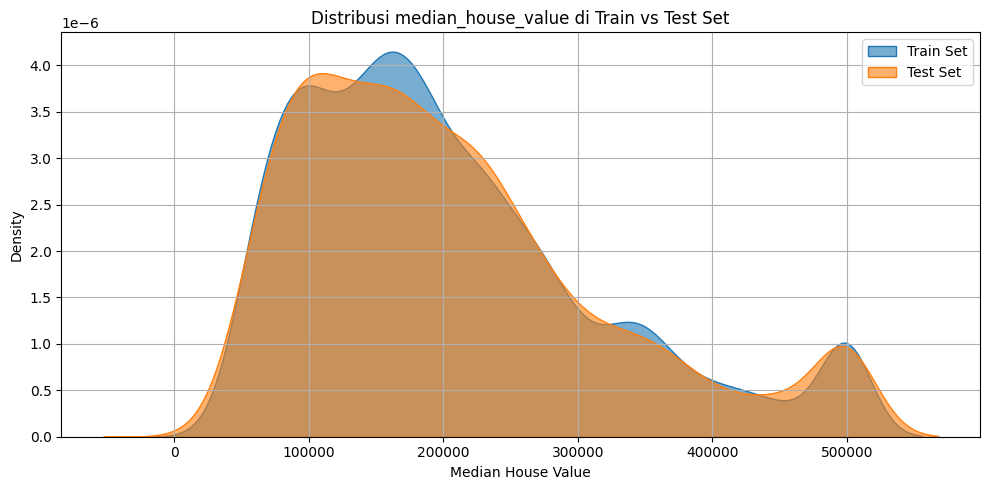

In [26]:

plt.figure(figsize=(10, 5))

sns.kdeplot(y_train, label='Train Set', fill=True, alpha=0.6)
sns.kdeplot(y_test, label='Test Set', fill=True, alpha=0.6)

plt.title('Distribusi median_house_value di Train vs Test Set')
plt.xlabel('Median House Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Notes:

Train Set dan Test Set memiliki pola distribusi yang hampir identik.
Artinya:
- Tidak ada bias distribusi dalam pemisahan data.
- Model yang kamu latih di Train Set punya peluang besar untuk geralisasi dengan baik ke Test Set.

### **4. Modelling**

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self

               Model     Mean RMSE     Std RMSE      Mean MAE  Mean MAPE
4            XGBoost  46189.140406  1103.404867  30633.506453   0.163564
3      Random Forest  49495.098570  1615.972763  31810.470426   0.173068
1                KNN  59193.524887   711.414275  41252.383978   0.241511
2      Decision Tree  70116.225965  3737.567002  45888.155781   0.256285
0  Linear Regression  80385.019283  5760.692253  48205.408014   0.253028


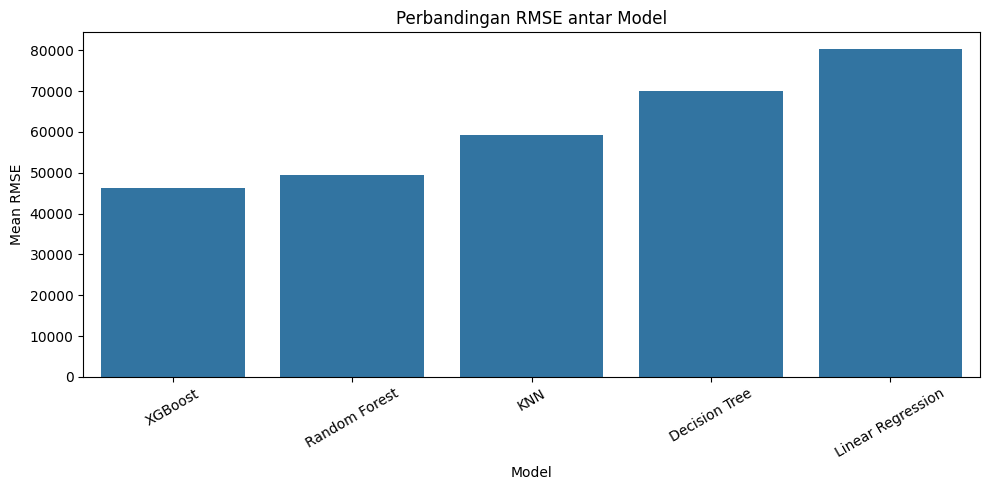

In [27]:
# 1. Definisikan model
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1),
    'XGBoost': XGBRegressor(random_state=1)
}

# 2. Bungkus dengan log-transform target
models_log = {
    name: TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp)
    for name, model in models.items()
}

# 3. Preprocessing pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_attribs = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_attribs)
])

# 4. KFold dan penilaian
cv = KFold(n_splits=5, shuffle=True, random_state=1)

results = []

for name, model in models_log.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    
    rmse = -cross_val_score(pipe, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    mae  = -cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
    mape = -cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=cv)

    results.append({
        'Model': name,
        'Mean RMSE': rmse.mean(),
        'Std RMSE': rmse.std(),
        'Mean MAE': mae.mean(),
        'Mean MAPE': mape.mean()
    })

# 5. Hasil akhir
df_results = pd.DataFrame(results).sort_values(by='Mean RMSE')

print(df_results)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x='Model', y='Mean RMSE')
plt.title('Perbandingan RMSE antar Model')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Notes:

- XGboost adalah model terbaik karena memiliki RMSE paling rendah (46,189), MAE paling rendah (30,633), dan MAPE paling rendah (16.36%)
- Random Forest tidak sebaik XGBoost, performanya masih tergolong baik dengan RMSE 49,495 dan MAE 31,810.
- KNN dan Decision Tree memiliki RMSE dan MAE yang jauh lebih tinggi , dan MAPE nya >24% , sehingga bisa disimpulkan model kurang akurat dan tidak konsisten
- Linear Regression bisa dikatakan paling buruk, mungkin karena ini merupakan model yang cukup sederhana

Selanjutnya, saya melakukan evaluasi untuk mengetahui seberapa baik model terbaik (XGBoost) bekerja pada data test.

**Evaluasi Model Terbaik**

In [ ]:
# Model terbaik (berdasarkan RMSE terendah)
best_model_name = df_results.iloc[0]['Model']
best_model = models_log[best_model_name]

# Buat ulang pipeline
final_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', best_model)
])

# Fit ke training data
final_pipe.fit(X_train, y_train)

# Prediksi di test set
y_pred = final_pipe.predict(X_test)

# Evaluasi
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))
mae_best = mean_absolute_error(y_test, y_pred)
mape_best = mean_absolute_percentage_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred)

print(f"\n=== Evaluation on Test Set for {best_model_name} ===")
print(f"Test RMSE : {rmse_best:,.2f}")
print(f"Test MAE  : {mae_best:,.2f}")
print(f"Test MAPE  : {mape_best:,.4f}")
print(f"Test R²   : {r2_best:.4f}")


=== Evaluation on Test Set for XGBoost ===
Test RMSE : 44,863.17
Test MAE  : 29,765.89
Test MAPE  : 0.1612
Test R²   : 0.8515


Notes :

Hasilnya lebih baik dari pada cross validation sebelumnya, mungkin dapat dikarenakan beberapa hal :
- Test set lebih mudah diprediksi atau dapat dikatakan distribusinya mirip dengan data train, atau tidak mengandung banyak outlier.
- Cross-validation biasanya lebih ketat karena menguji model di banyak kombinasi data, ada kemungkinan variasi performa antar fold.
- Ukuran test set lebih kecil
- Pipeline cenderung bersih dan tidak overfitting.

Setelah mengetahui model terbaik dari cross-validation, langkah selanjutnya adalah mengevaluasi performa tiap model di test set. Tujuannya untuk melihat performa dari tiap model sebelum kita melakukan tuning lebih lanjut. Evaluasi ini mencakup nilai RMSE, MAE, dan MAPE dari masing-masing model. Hasilnya akan jadi dasar untuk menentukan model mana yang paling layak dituning

**Evaluasi Tiap Model**

In [36]:
score_rmse = []
score_mae = []
score_mape = []

for name, model_instance in models_log.items():  # gunakan models_log, bukan models biasa
    model = Pipeline([
        ('prep', preprocessor), 
        ('model', model_instance)
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
}, index=models_log.keys())

score_before_tuning_sorted = score_before_tuning.sort_values(by='RMSE', ascending=True)
display(score_before_tuning_sorted)



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


,RMSE,MAE,MAPE
XGBoost,44863.165957,29765.886484,0.161181
Random Forest,47891.788150,30771.080488,0.169936
KNN,58384.498064,40599.832510,0.240451
Decision Tree,70080.588185,45759.679366,0.260098
Linear Regression,99627.058117,50923.947686,0.263904


Notes :
Dari hasil ini, dapat disimpulkan bahwa **XGBoost** lebih unggul dari Random Forest dan model lainnya
- RMSE lebih rendah -> akurasi lebih tinggi
- MAE lebih rendah -> rata-rata kesalahn lebih rendah
- MAPE lebih rendah -> interpretasi lebih baik

**Hyperparameter Tuning**

Untuk meningkatkan performa model, dilakukan proses hyperparameter tuning terhadap model terbaik (XGBoost) menggunakan RandomizedSearchCV. Tuning ini bertujuan untuk mencari kombinasi parameter terbaik yang dapat meminimalkan error prediksi.

In [30]:
# Hyperparam space
param_dist = {
    'model__max_depth': list(np.arange(1, 11)),
    'model__learning_rate': list(np.arange(1, 100) / 100),
    'model__n_estimators': list(np.arange(100, 201)),
    'model__subsample': list(np.arange(2, 10) / 10),
    'model__gamma': list(np.arange(1, 11)),
    'model__colsample_bytree': list(np.arange(1, 10) / 10),
    'model__reg_alpha': list(np.logspace(-3, 1, 10))
}

# Model
xgb = XGBRegressor(random_state=1, verbosity=0)

# Pipeline 
pipeline_xgb = Pipeline([
    ('preprocessing', transformer),
    ('model', xgb)
])

# CV setup
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Randomized Search
random_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    refit=True,
    verbose=1,
    random_state=1
)

# Fit
random_xgb.fit(X_train, y_train)
print("Best Params:", random_xgb.best_params_)
print("Best CV RMSE:", -random_xgb.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.05994842503189409), 'model__n_estimators': np.int64(119), 'model__max_depth': np.int64(8), 'model__learning_rate': np.float64(0.05), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.8)}
Best CV RMSE: 48490.51042916927


In [38]:
# model hasil tuning dari RandomizedSearchCV
xgb_tuning = random_xgb.best_estimator_

# Prediksi pada test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Hitung metrik performa
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Simpan ke DataFrame
score_after_tuning = pd.DataFrame({
    'RMSE': [rmse_xgb_tuning],
    'MAE': [mae_xgb_tuning],
    'MAPE': [mape_xgb_tuning]
}, index=['XGBoost'])

score_after_tuning


,RMSE,MAE,MAPE
XGBoost,47379.613147,31994.831445,0.18452


Notes :

Hasil dari tuning, menunjukan ada kenaikan dalan RMSE, MAE dan MAPE, akan saya berikan kesimpulan di bagian akhir
Meskipun terjadi sedikit penurunan performa dibanding sebelum tuning, proses ini tetap bermanfaat untuk mengeksplorasi kombinasi parameter yang optimal.

Sebagai langkah lanjutan, dilakukan analisis feature importance untuk mengetahui fitur-fitur apa saja yang paling berkontribusi terhadap prediksi model. Dengan memahami fitur paling penting, kita dapat mengambil insight lebih dalam dari data, serta menjadi dasar untuk pengambilan keputusan atau feature engineering ke depannya.

**Analisis Feature Importance**

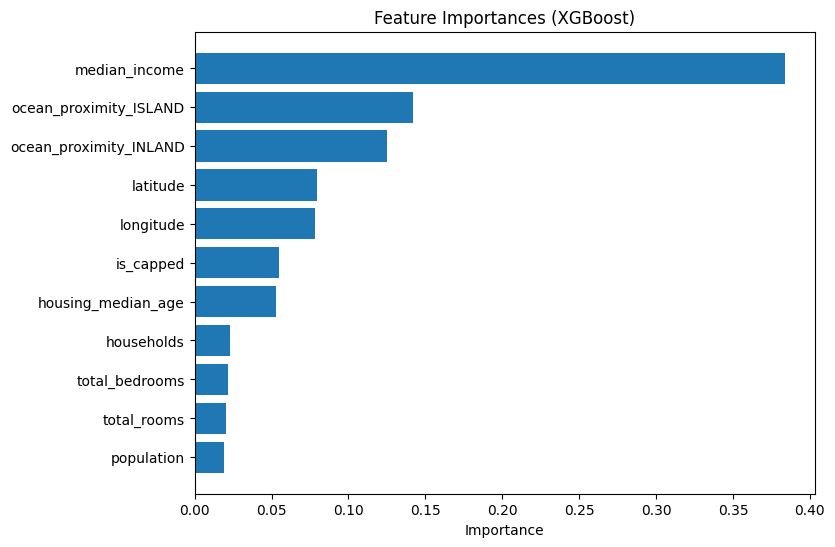

In [ ]:
booster = best_model.named_steps['model']
importances = booster.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.show()

Notes :

Grafik tersebut menunjukkan Feature Importances (XGBoost), yaitu seberapa besar kontribusi masing-masing fitur dalam memprediksi nilai targ (median_house_value). Berikut kesimpulan untuk 5 fitur dengan tingkat importance tertinggi :
- **median_income**  
  Fitur paling berpengaruh dengan kontribusi hampir 40%.  
  Menunjukkan bahwa pendapatan median suatu area sangat menentukan harga rumah.

- **ocean_proximity_ISLAND**  
  Rumah yang berada di pulau cenderung memiliki harga yang lebih tinggi.

- **ocean_proximity_INLAND**  
  Rumah yang jauh dari laut juga berpengaruh terhadap harga, meski tidak sebesar rumah di pulau.

- **latitude dan longitude**  
  Koordinat geografis cukup berperan, mengindikasikan bahwa lokasi secara umum memengaruhi harga rumah.


In [34]:
score_before_xgb = score_before_tuning.loc[['XGBoost']].copy()
score_comparison = pd.concat([
    score_before_tuning.loc[['XGBoost']],
    pd.DataFrame({
        'RMSE': [rmse_xgb_tuning],
        'MAE': [mae_xgb_tuning],
        'MAPE': [mape_xgb_tuning]
    }, index=['XGBoost (Tuned)'])
])

display(score_comparison)


,RMSE,MAE,MAPE
XGBoost,44863.165957,29765.886484,0.161181
XGBoost (Tuned),47379.613147,31994.831445,0.184520


Notes :

Setelah melakukan proses hyperparameter tuning terhadap model XGBoost, hasil evaluasi menunjukkan bahwa performa model justru sedikit menurun dibandingkan dengan model default (tanpa tuning). Hal ini bisa dikarenakan :
- Overfitting pada data pelatihan saat tuning,
- Kombinasi parameter kurang optimal untuk dataset ini
- Tuning space yang terlalu sempit/luas.

Sehingga dalam kasus ini, saya akan menggunakan Model XGBoost awal untuk Final Model karena:
- Performa lebih baik dibandingkan versi setelah hyperparameter tuning.
- RMSE, MAE, dan MAPE lebih rendah pada model awal (lebih akurat).
- Hasil tuning justru menyebabkan sedikit penurunan performa (kemungkinan overfitting).
- Model default memberikan hasil yang lebih stabil dan generalisasi lebih baik.
- Efisiensi waktu dan sumber daya lebih optimal dengan model default.



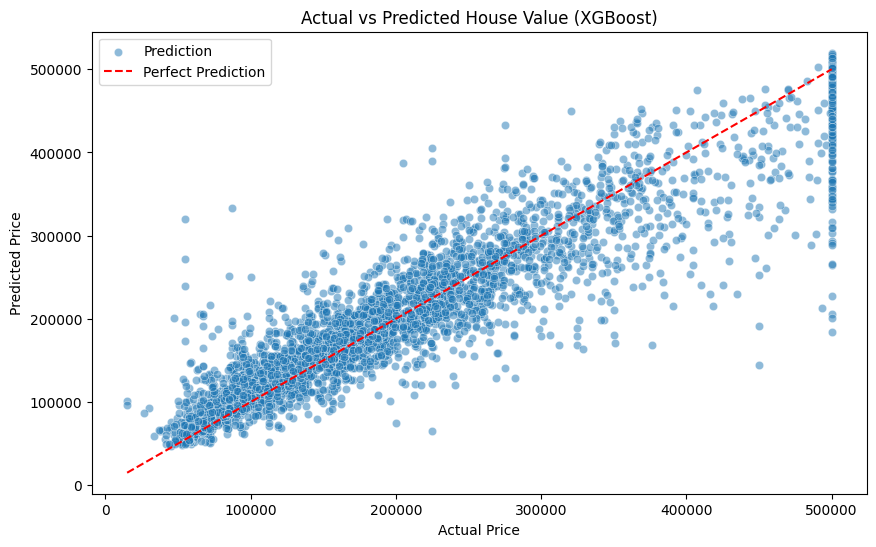

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning, alpha=0.5, label='Prediction')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label='Perfect Prediction'
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Value (XGBoost)")
plt.legend(loc='upper left')  
plt.show()


Notes :

Dari plot yang sudah dibuat, dapat dilihat terdapat beberapa penyimpangan yang menunjukan overestimation dan underestimation, terutama pada:
- Underprediction pada rumah-rumah dengan harga tinggi (titik berada di bawah garis merah).
- Overprediction yang muncul pada beberapa rumah dengan harga aktual rendah.
- Sebaran error yang meningkat di harga tinggi dapat disebabkan oleh batas maksimum harga (median_house_value) yang dibatasi pada 500.000 oleh sistem pencatatan, sehingga model tidak dapat mempelajari variasi lebih lanjut di segmen harga yang tinggi.

Secara metrik, model terbaik menghasilkan:
- **RMSE (Root Mean Squared Error)** sebesar **44.863**:  
  Artinya, secara rata-rata, prediksi harga rumah meleset sekitar 44.863 USD dari nilai sebenarnya.

- **MAE (Mean Absolute Error)** sebesar **29.766**:  
  Ini menunjukkan bahwa selisih absolut rata-rata antara prediksi dan nilai aktual adalah sekitar 29.766 USD. 

- **MAPE (Mean Absolute Percentage Error)** sebesar **16.1%**:  
  Secara rata-rata, model meleset sekitar 16.1% dari nilai harga rumah aktual.

Secara keseluruhan, model ini mampu memberikan prediksi harga rumah yang cukup akurat, dan dapat digunakan sebagai dasar pengambilan keputusan dalam konteks bisnis properti atau perencanaan wilayah.


Berdasarkan klasifikasi yang diberikan oleh Armstrong (2001) dan Hyndman & Koehler (2006), nilai MAPE di bawah 20% termasuk dalam kategori "prediksi yang baik" (good forecast accuracy), khususnya dalam konteks prediksi harga properti yang secara by default memiliki volatilitas tinggi.

Dengan demikian, meskipun masih terdapat error dan ruang perbaikan di bagian distribusi, model XGBoost ini telah menunjukkan bahwa model memiliki kemampuan yang layak dan cukup dalam memperkirakan harga rumah pada rentang data yang telah dipelajari.

Sources:
- Armstrong, J. S. (2001). Principles of Forecasting: A Handbook for Researchers and Practitioners.
- Hyndman, R. J., & Koehler, A. B. (2006). Another look at measures of forecast accuracy. International Journal of Forecasting, 22(4), 679-688.

### **5. Conclusion**

Berdasarkan permasalahan yang telah diidentifikasi, yaitu ketidakmampuan para stakeholder seperti calon pembeli, investor properti, maupun developer dalam mengevaluasi harga rumah secara objektif dan berbasis data, proyek ini bertujuan untuk membangun sebuah prediction tool yang mampu memperkirakan nilai properti secara akurat, sekaligus menganalisis faktor-faktor yang paling memengaruhi harga rumah, termasuk pengaruh dari kedekatan terhadap laut (ocean proximity).

Hasil pemodelan menunjukkan bahwa model XGBoost merupakan model dengan performa terbaik dalam memprediksi nilai median_house_value, mengungguli model baseline lainnya seperti Linear Regression dan Random Forest. Fitur median_income terbukti menjadi faktor paling signifikan, disusul oleh ocean_proximity, yang secara kuantitatif terbukti memiliki kontribusi nyata terhadap peningkatan nilai properti. Temuan ini menjawab hipotesis awal bahwa rumah yang berlokasi dekat dengan laut cenderung memiliki nilai jual lebih tinggi.

Evaluasi model dilakukan menggunakan metrik RMSE, MAE, dan MAPE. Nilai MAPE model sebesar ~16.1% tergolong dalam kategori “prediksi yang baik” menurut klasifikasi Armstrong (2001) dan Hyndman & Koehler (2006). Ini berarti, dalam konteks real-world, model ini mampu memperkirakan harga rumah dengan rata-rata error relatif di bawah 20%, yang dapat diterima untuk pengambilan keputusan properti secara strategis.

Meskipun demikian, visualisasi actual vs predicted menunjukkan bahwa model cenderung underestimate harga rumah dengan nilai tinggi, dan sebaran error meningkat pada harga di atas $400.000. Hal ini disebabkan oleh keterbatasan dataset, seperti capping nilai maksimum di angka $500.000 dan absennya fitur penting seperti ukuran bangunan, jumlah kamar yang valid, atau variabel lingkungan sekitar.

### **6. Recommendation**

**1. Lakukan A/B testing**  

Untuk menguji efektivitas model dalam konteks nyata, disarankan dilakukan **A/B testing** terhadap calon pengguna seperti agen properti, investor, atau pembeli rumah. Dalam uji coba ini, satu grup dapat menentukan harga rumah secara manual berdasarkan pengalaman/intuisi, sedangkan grup lainnya menggunakan **hasil prediksi dari model**. Dengan cara ini, kita dapat mengukur apakah penggunaan model benar-benar meningkatkan **akurasi valuasi**, mempercepat pengambilan keputusan, atau bahkan memperbesar peluang properti untuk dijual dengan cepat.

**2. Analisis prediksi dengan error tinggi (over vs underestimation)**  

Lakukan identifikasi pada hasil prediksi yang memiliki error tinggi, lalu kelompokkan menjadi 3:
- **Overestimation ekstrem (5%)**
- **Underestimation ekstrem (5%)**
- **Grup mayoritas (90%) dengan error mendekati rata-rata**

Selanjutnya, evaluasi hubungan antara variabel independen dengan masing-masing kelompok error. Hal ini bertujuan untuk mengidentifikasi fitur-fitur atau karakteristik tertentu (misalnya: lokasi inland, income rendah, atau rumah di area padat) yang mungkin menyebabkan error tinggi. Dari sini, kita bisa melakukan targeted feature engineering agar model lebih adaptif terhadap variasi kondisi tertentu.


**3. Penambahan fitur eksternal yang lebih representatif**  

Jika memungkinkan, tambahkan fitur-fitur penting yang saat ini tidak tersedia dalam dataset, seperti:
- **Luas rumah (square footage)**
- **Jumlah kamar yang valid**
- **Jarak ke pusat kota atau fasilitas umum (schools, hospitals, highways)**
- **Data lingkungan seperti tingkat kriminalitas atau akses ke transportasi publik**

Penambahan fitur seperti ini dapat meningkatkan kapasitas model dalam memahami konteks properti secara lebih komprehensif.

**4. Pembaruan data dan model retraining secara berkala**  

Pasar properti bersifat dinamis. Maka, pembaruan data dan retraining model secara berkala perlu dilakukan untuk menjaga relevansi model terhadap kondisi pasar terkini, seperti tren harga baru, pergeseran demografi, atau perubahan kebijakan regional.


**5. Pengembangan model untuk estimasi lanjutan**  
Model ini juga dapat dijadikan dasar untuk pengembangan sistem lanjutan, seperti:
- **Model penyesuaian harga properti berdasarkan sentimen review pembeli (jika tersedia)**
- **Model deteksi harga listing yang terlalu mahal/murah secara otomatis**
- **Model klasifikasi kelayakan investasi berdasarkan lokasi dan prediksi kenaikan harga**

Jika data tambahan tersedia (misalnya review pengguna, histori jual-beli, atau estimasi ROI), maka sistem dapat diintegrasikan dengan **analisis sentimen atau prediksi time series** untuk menunjang keputusan investasi jangka panjang.


---

### **Save Model**

In [ ]:
import pickle

# Save model ke file
with open('model_xgb.pkl', 'wb') as file:
    pickle.dump(final_pipe, file)

# Load model dari file
with open('model_xgb.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
